In [3]:
import numpy as np
import pandas as pd
import random

from pathlib import Path
from tqdm import tqdm

# Experiment

In [4]:
ID = ["ID"]
USER = ["SubjectID"]
IDS = ["SubjectID", "VideoID"]
TARGET = ["predefinedlabel"]
FEATURES = ["Delta", "Theta", "Alpha1", "Alpha2", "Beta1", "Beta2", "Gamma1", "Gamma2"]
INIT_SEED = 6412

In [5]:
data_dir = Path("/home/aseliverstov/projects/brain_signals/data")
data = pd.read_csv(data_dir / "EEG_data.csv")

data["ID"] = (len(np.unique(data["VideoID"])) * data["SubjectID"] + data["VideoID"]).astype("int")
data = data[ID + USER + FEATURES + TARGET]

data.head(3)

,ID,SubjectID,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel
0,0,0.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0
1,0,0.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0
2,0,0.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0


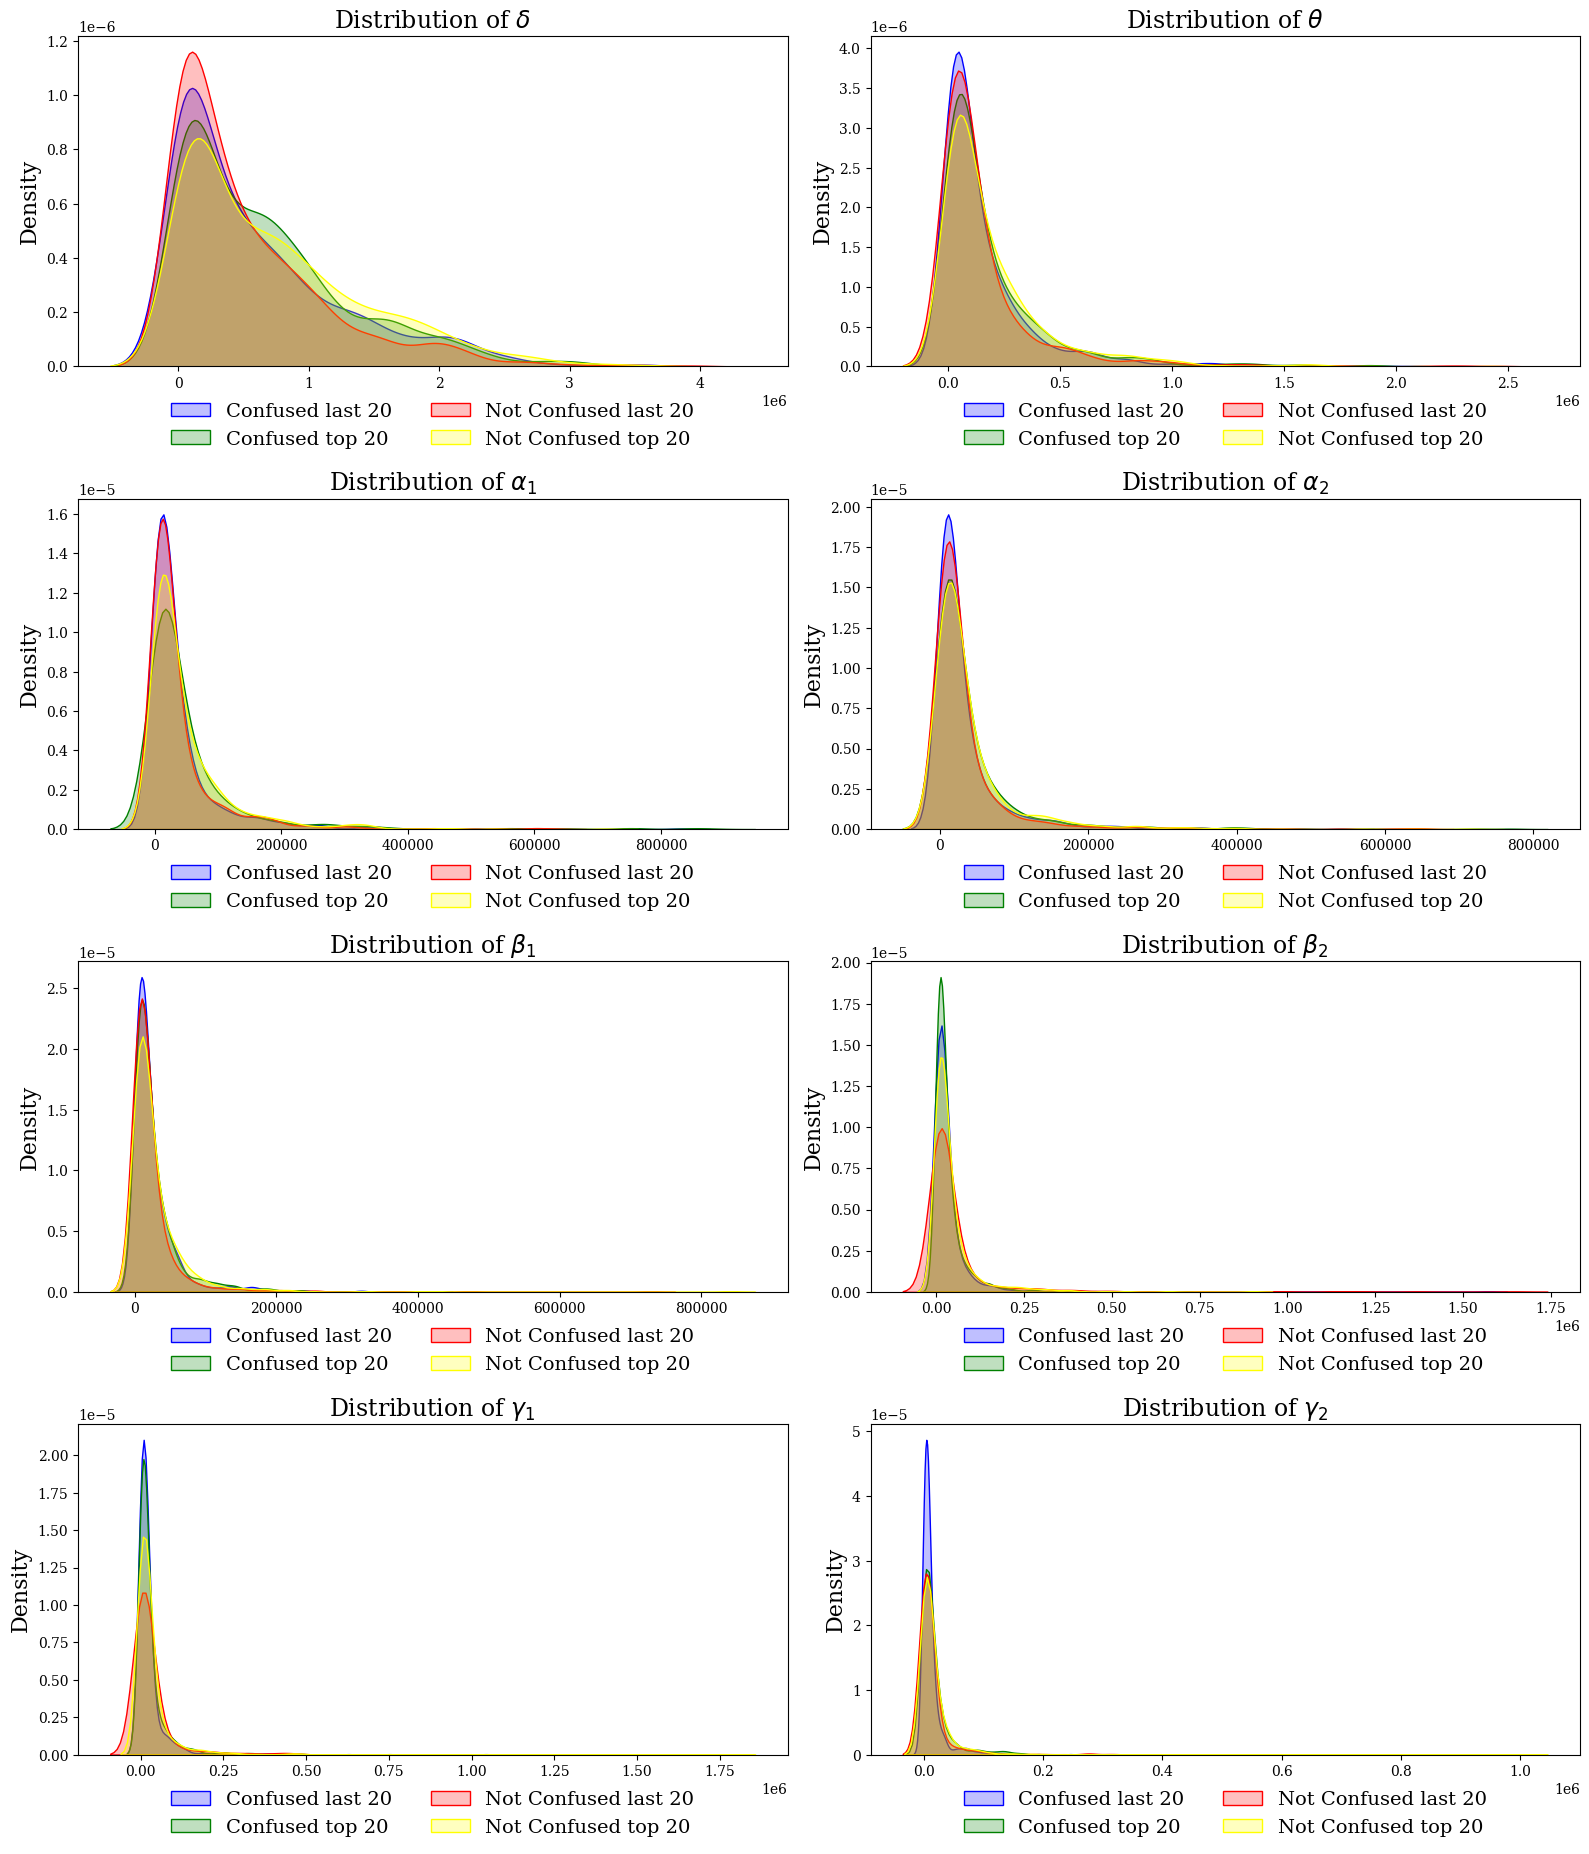

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Apply consistent Matplotlib style
mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times", "DejaVu Serif", "Computer Modern Roman"],
    "text.usetex": False,
    "axes.labelsize": 16,
    "axes.titlesize": 17,
    "legend.fontsize": 14
})

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()
signal_name = {
    "Delta": r"$\delta$",
    "Theta": r"$\theta$",
    "Alpha1": r"$\alpha_{1}$",
    "Alpha2": r"$\alpha_{2}$",
    "Beta1": r"$\beta_{1}$",
    "Beta2": r"$\beta_{2}$",
    "Gamma1": r"$\gamma_{1}$",
    "Gamma2": r"$\gamma_{2}$",
}

for i, signal in enumerate(FEATURES):
    ax = axes[i]

    last_20 = data.groupby("ID").tail(20)
    top_20 = data.groupby("ID").head(20)

    sns.kdeplot(
        data=last_20[last_20["predefinedlabel"] == 1],
        x=signal, color="blue", label="Confused last 20",
        ax=ax, fill=True, common_norm=False
    )
    sns.kdeplot(
        data=top_20[top_20["predefinedlabel"] == 1],
        x=signal, color="green", label="Confused top 20",
        ax=ax, fill=True, common_norm=False
    )
    sns.kdeplot(
        data=last_20[last_20["predefinedlabel"] == 0],
        x=signal, color="red", label="Not Confused last 20",
        ax=ax, fill=True, common_norm=False
    )
    sns.kdeplot(
        data=top_20[top_20["predefinedlabel"] == 0],
        x=signal, color="yellow", label="Not Confused top 20",
        ax=ax, fill=True, common_norm=False
    )

    ax.set_title(f"Distribution of {signal_name[signal]}")
    ax.legend(loc="lower center", ncol=2, frameon=False, bbox_to_anchor=(0.5, -0.3))
    ax.set_xlabel("")

# Adjust layout and spacing for legend placement
plt.tight_layout()
plt.subplots_adjust(bottom=0.12, hspace=0.4)

# Save the figure as a high-quality PDF
plt.savefig("../../assets/feature_distributions_20.pdf", format="pdf", bbox_inches="tight", dpi=1200)
plt.show()


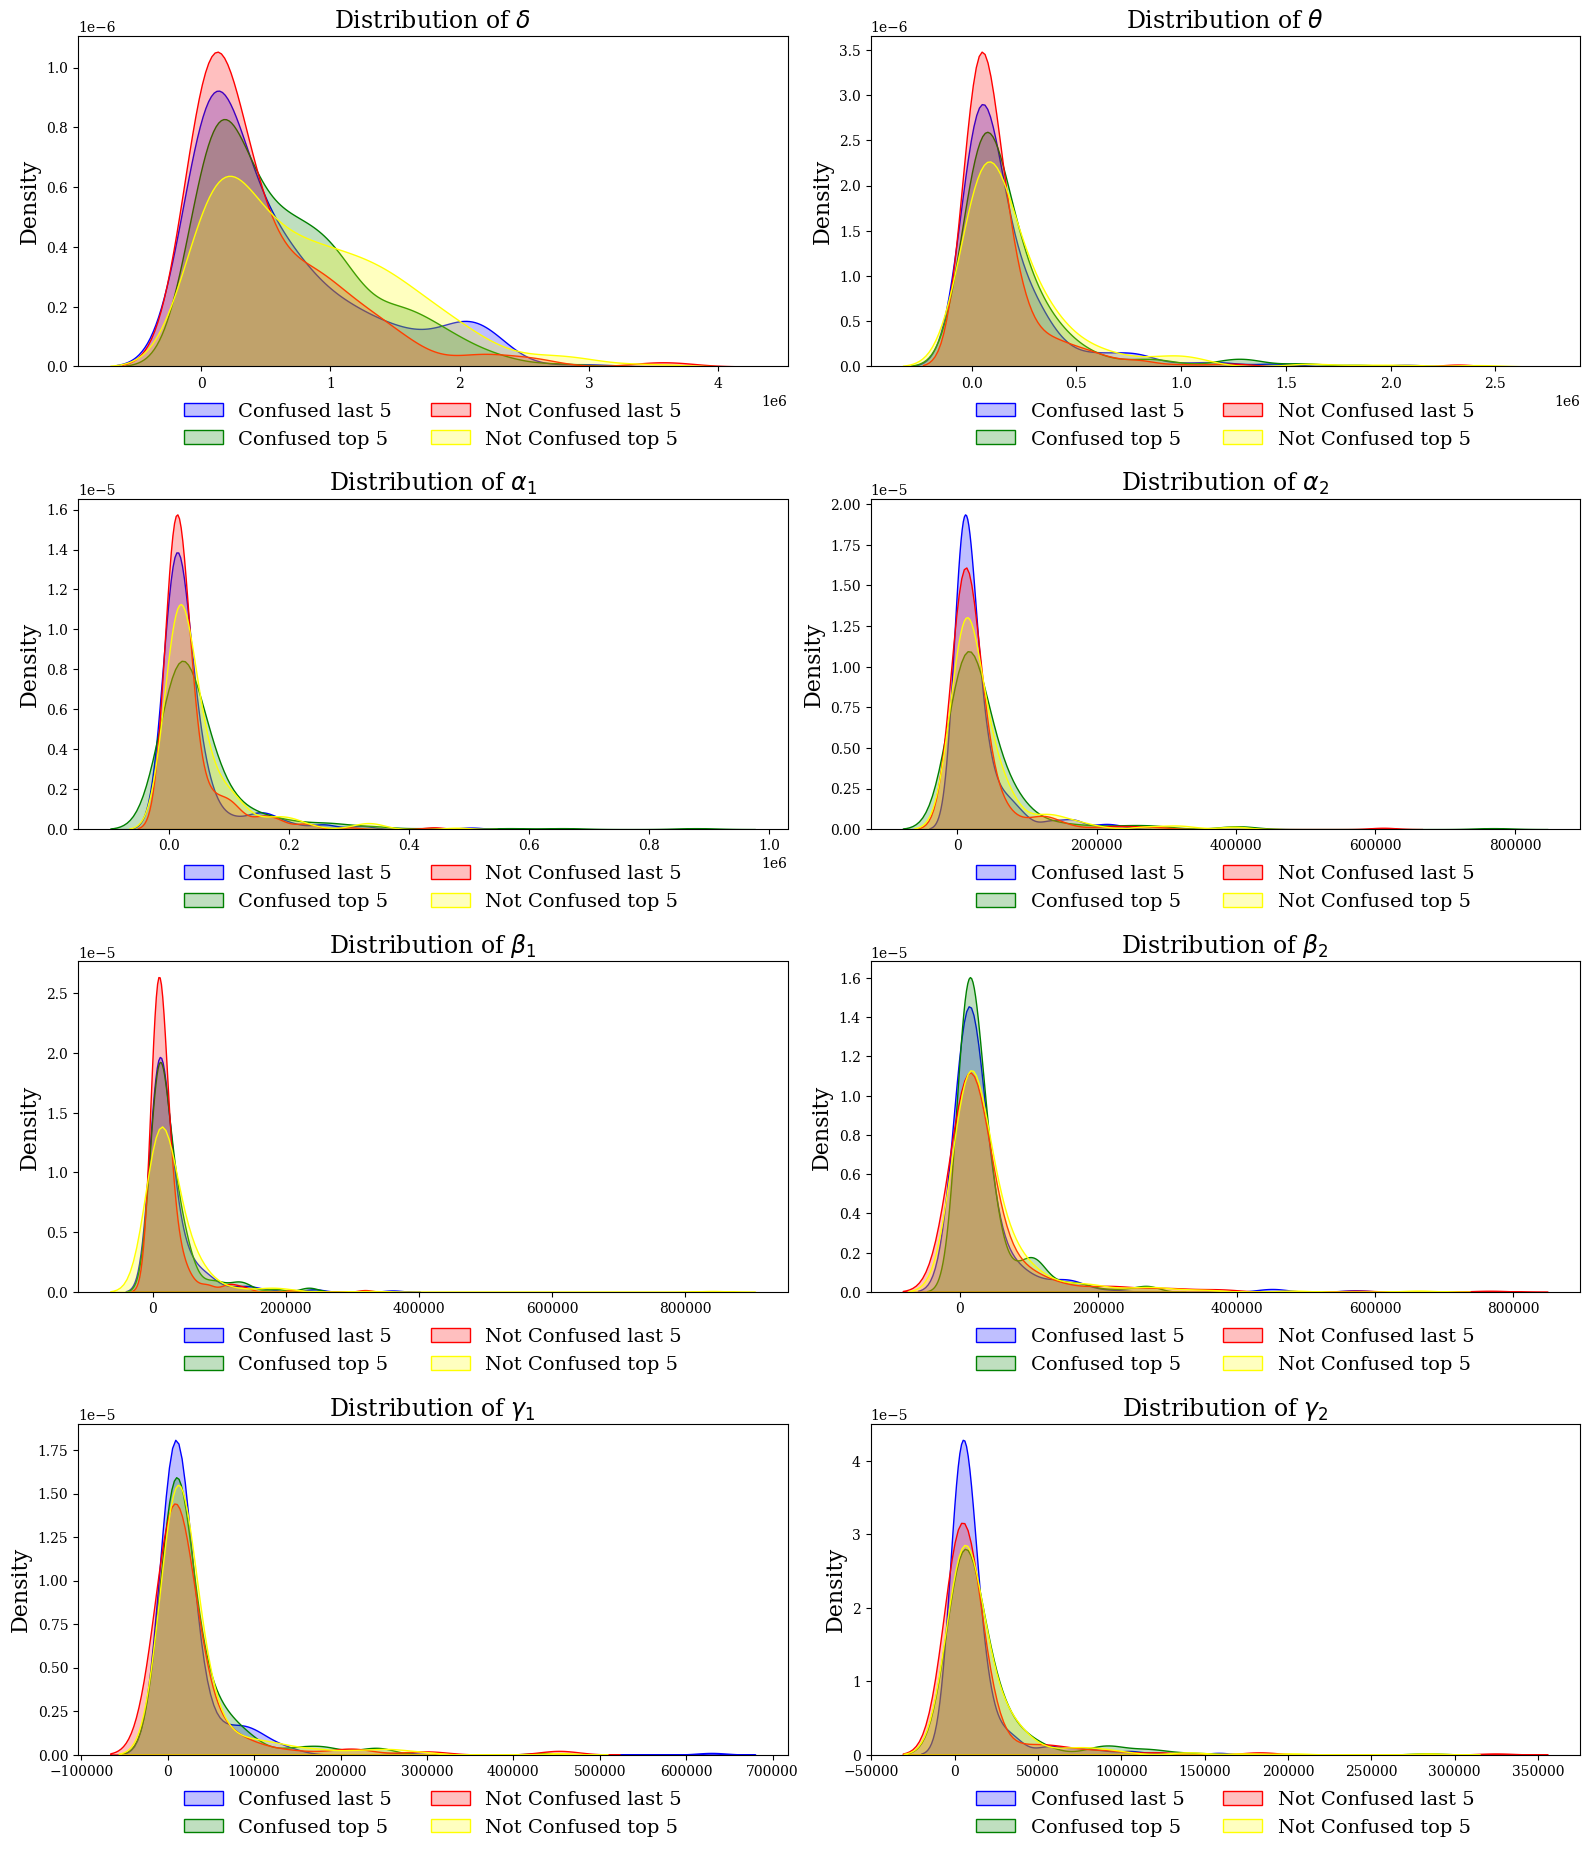

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Apply consistent Matplotlib style
mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times", "DejaVu Serif", "Computer Modern Roman"],
    "text.usetex": False,
    "axes.labelsize": 16,
    "axes.titlesize": 17,
    "legend.fontsize": 14
})

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()
signal_name = {
    "Delta": r"$\delta$",
    "Theta": r"$\theta$",
    "Alpha1": r"$\alpha_{1}$",
    "Alpha2": r"$\alpha_{2}$",
    "Beta1": r"$\beta_{1}$",
    "Beta2": r"$\beta_{2}$",
    "Gamma1": r"$\gamma_{1}$",
    "Gamma2": r"$\gamma_{2}$",
}


for i, signal in enumerate(FEATURES):
    ax = axes[i]

    last_5 = data.groupby("ID").tail(5)
    top_5 = data.groupby("ID").head(5)

    sns.kdeplot(
        data=last_5[last_5["predefinedlabel"] == 1],
        x=signal, color="blue", label="Confused last 5",
        ax=ax, fill=True, common_norm=False
    )
    sns.kdeplot(
        data=top_5[top_5["predefinedlabel"] == 1],
        x=signal, color="green", label="Confused top 5",
        ax=ax, fill=True, common_norm=False
    )
    sns.kdeplot(
        data=last_5[last_5["predefinedlabel"] == 0],
        x=signal, color="red", label="Not Confused last 5",
        ax=ax, fill=True, common_norm=False
    )
    sns.kdeplot(
        data=top_5[top_5["predefinedlabel"] == 0],
        x=signal, color="yellow", label="Not Confused top 5",
        ax=ax, fill=True, common_norm=False
    )

    ax.set_title(f"Distribution of {signal_name[signal]}")
    ax.legend(loc="lower center", ncol=2, frameon=False, bbox_to_anchor=(0.5, -0.3))
    ax.set_xlabel("")

# Adjust layout and spacing for legend placement
plt.tight_layout()
plt.subplots_adjust(bottom=0.12, hspace=0.4)

# Save the figure as a high-quality PDF
plt.savefig("../../assets/feature_distributions_5.pdf", format="pdf", bbox_inches="tight", dpi=1200)
plt.show()


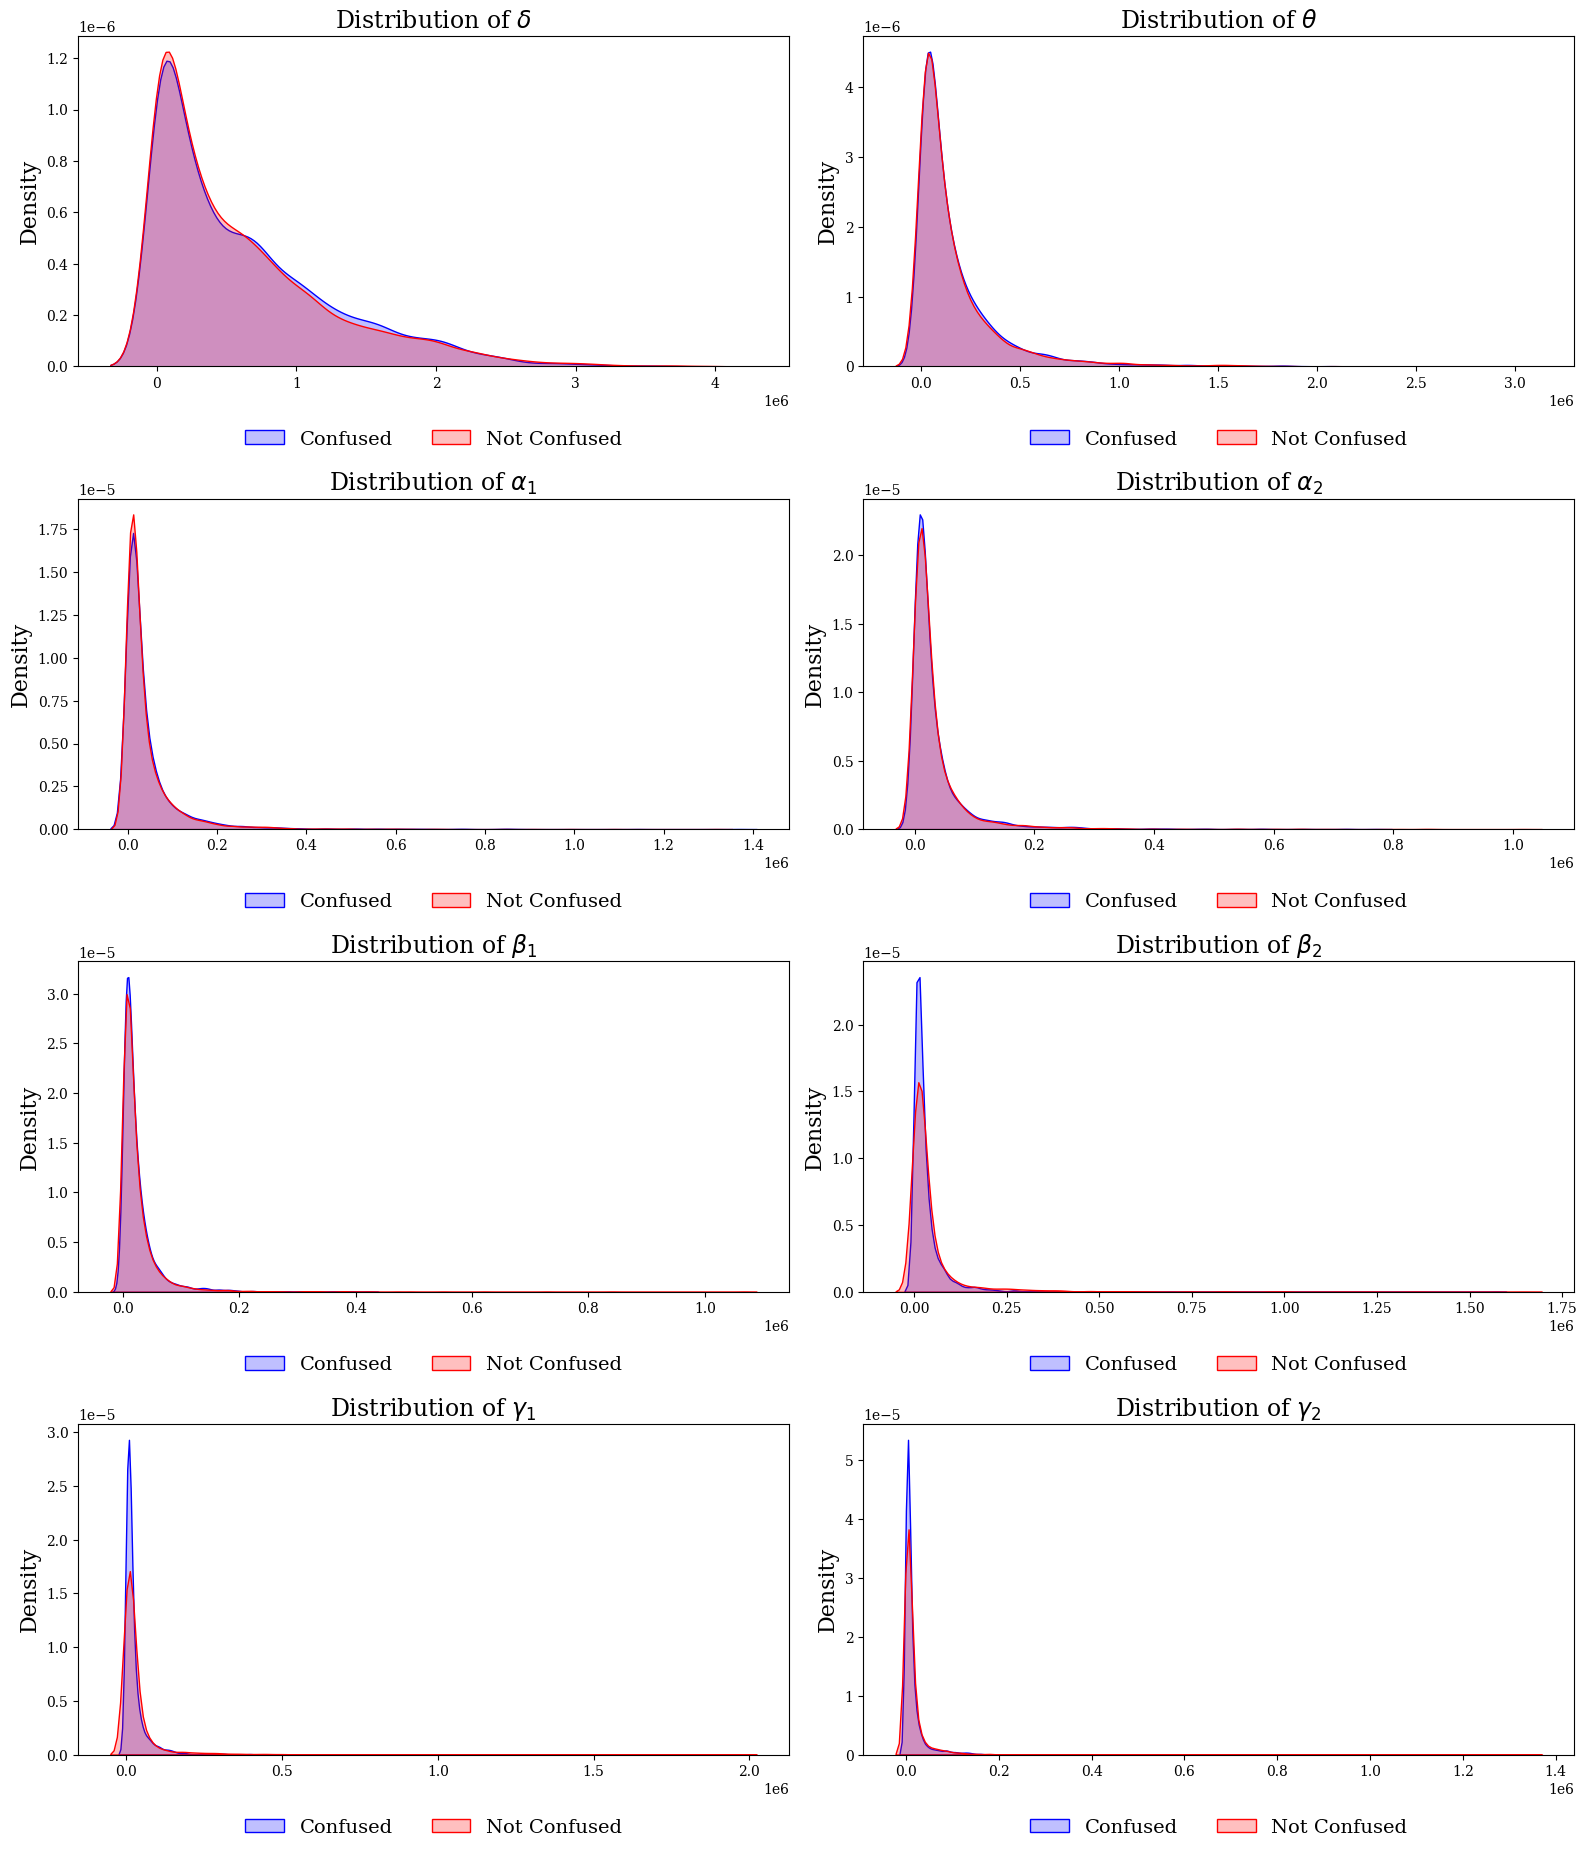

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Apply consistent Matplotlib style
mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times", "DejaVu Serif", "Computer Modern Roman"],
    "text.usetex": False,
    "axes.labelsize": 16,
    "axes.titlesize": 17,
    "legend.fontsize": 14
})

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()
signal_name = {
    "Delta": r"$\delta$",
    "Theta": r"$\theta$",
    "Alpha1": r"$\alpha_{1}$",
    "Alpha2": r"$\alpha_{2}$",
    "Beta1": r"$\beta_{1}$",
    "Beta2": r"$\beta_{2}$",
    "Gamma1": r"$\gamma_{1}$",
    "Gamma2": r"$\gamma_{2}$",
}

for i, signal in enumerate(FEATURES):
    ax = axes[i]

    sns.kdeplot(
        data=data[data["predefinedlabel"] == 1],
        x=signal, color="blue", label="Confused",
        ax=ax, fill=True, common_norm=False
    )
    sns.kdeplot(
        data=data[data["predefinedlabel"] == 0],
        x=signal, color="red", label="Not Confused",
        ax=ax, fill=True, common_norm=False
    )

    ax.set_title(f"Distribution of {signal_name[signal]}")
    ax.legend(loc="lower center", ncol=2, frameon=False, bbox_to_anchor=(0.5, -0.3))
    ax.set_xlabel("")

# Adjust layout and spacing for legend placement
plt.tight_layout()
plt.subplots_adjust(bottom=0.12, hspace=0.4)

# Save the figure as a high-quality PDF
plt.savefig("../../assets/feature_distributions_all.pdf", format="pdf", bbox_inches="tight", dpi=1200)
plt.show()

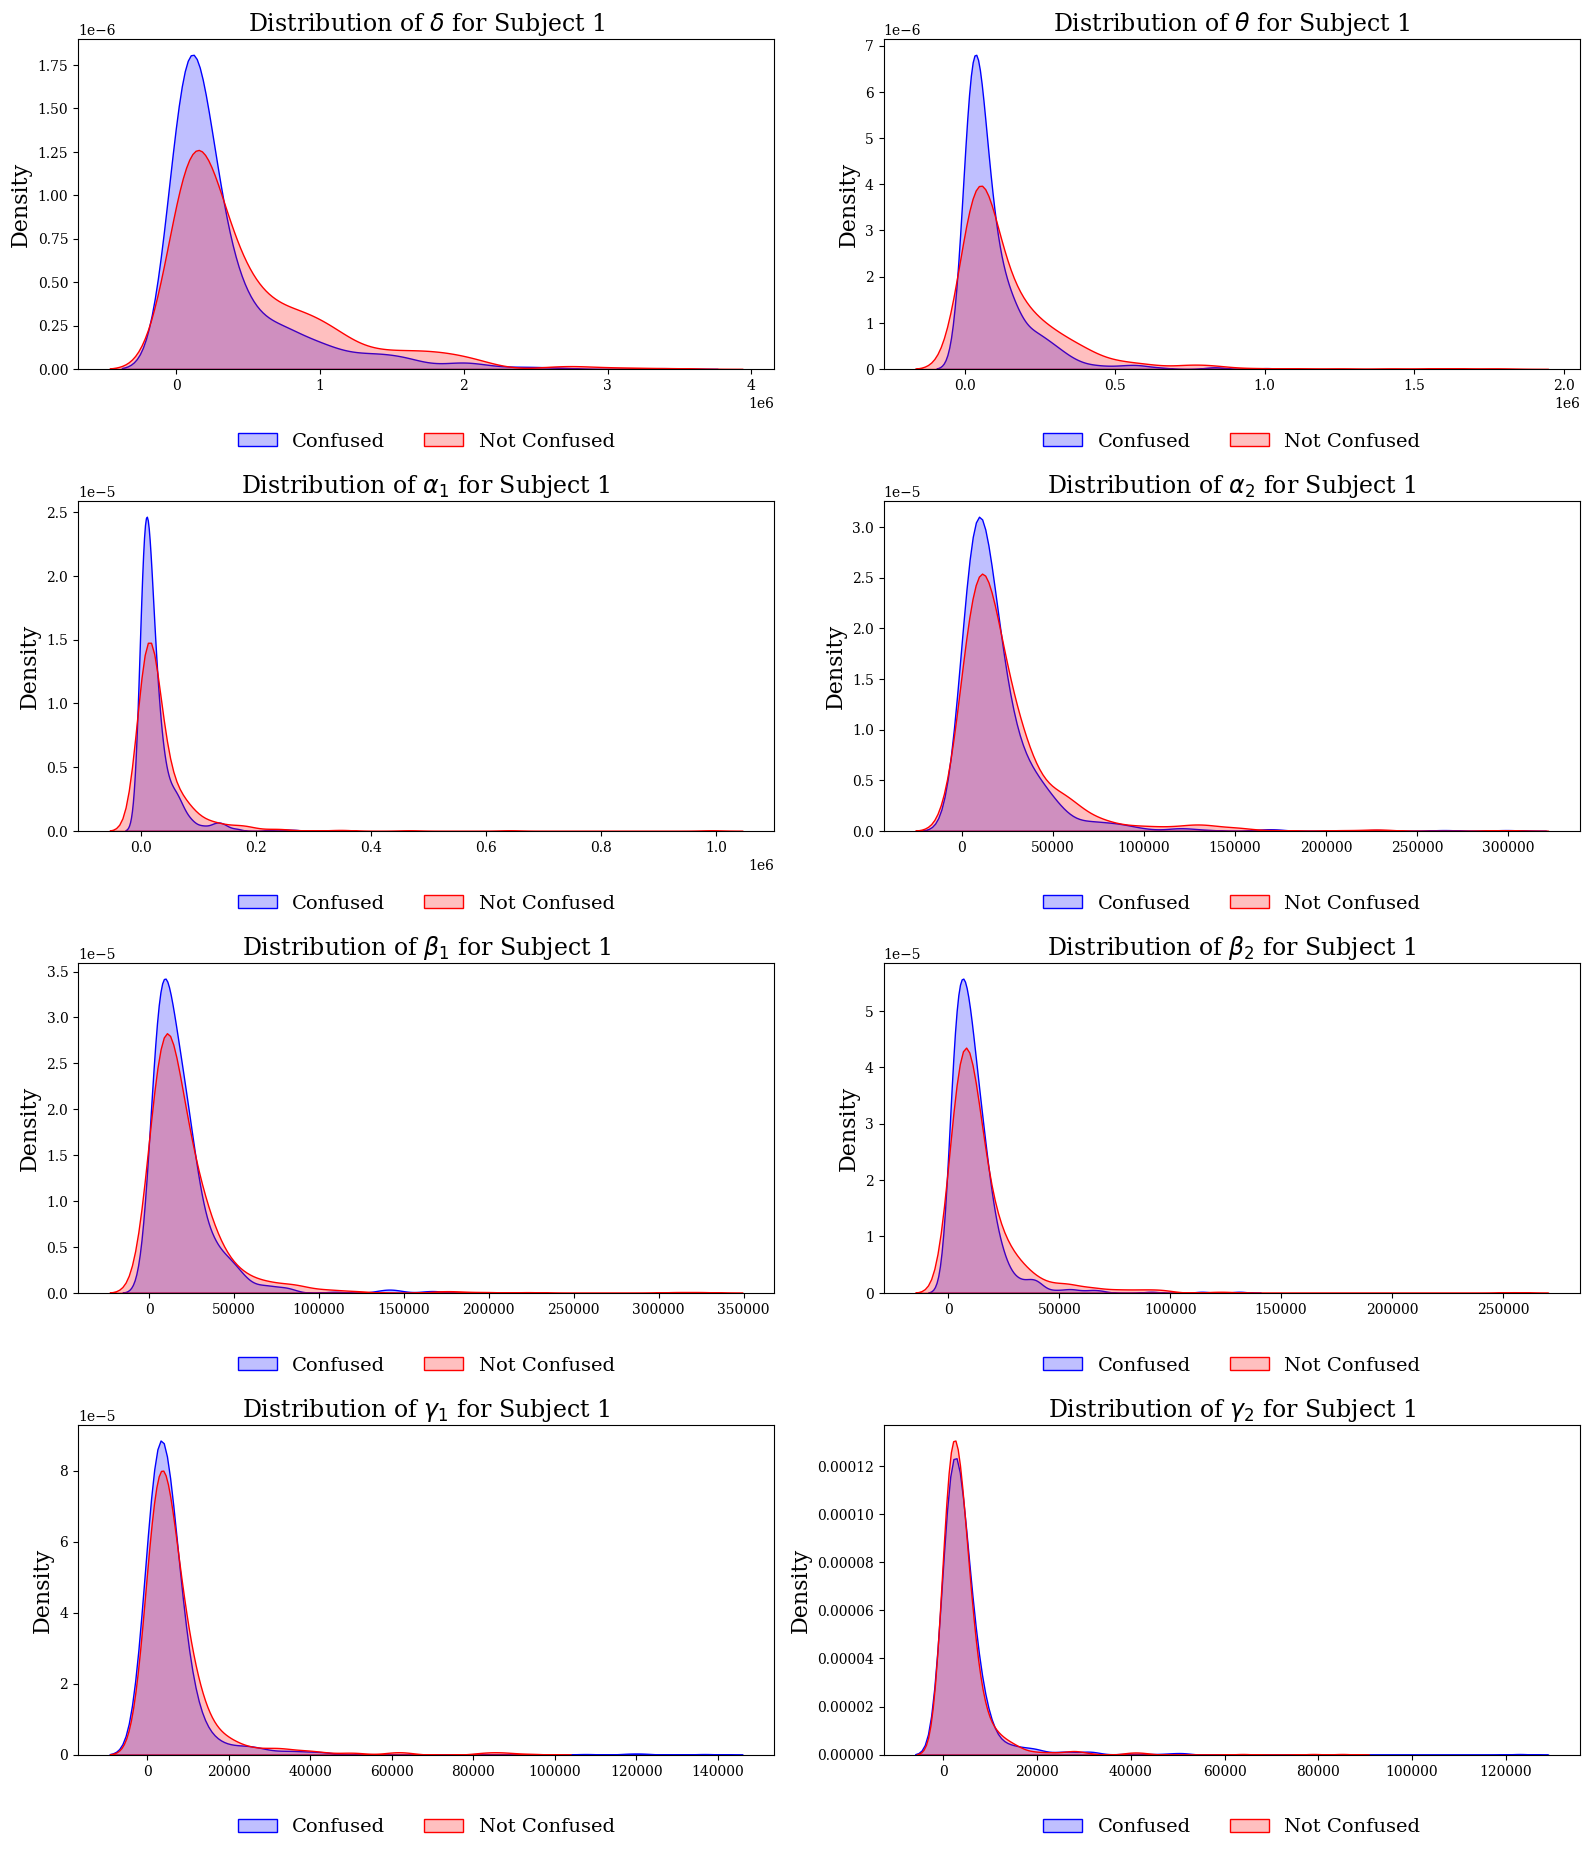

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Apply consistent Matplotlib style
mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times", "DejaVu Serif", "Computer Modern Roman"],
    "text.usetex": False,
    "axes.labelsize": 16,
    "axes.titlesize": 17,
    "legend.fontsize": 14
})

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

sub1_data = data[data["SubjectID"] == 1]

for i, signal in enumerate(FEATURES):
    ax = axes[i]

    sns.kdeplot(
        data=sub1_data[sub1_data["predefinedlabel"] == 1],
        x=signal, color="blue", label="Confused",
        ax=ax, fill=True, common_norm=False
    )
    sns.kdeplot(
        data=sub1_data[sub1_data["predefinedlabel"] == 0],
        x=signal, color="red", label="Not Confused",
        ax=ax, fill=True, common_norm=False
    )

    ax.set_title(f"Distribution of {signal_name[signal]} for Subject 1")
    ax.legend(loc="lower center", ncol=2, frameon=False, bbox_to_anchor=(0.5, -0.3))
    ax.set_xlabel("")

# Adjust layout and spacing for legend placement
plt.tight_layout()
plt.subplots_adjust(bottom=0.12, hspace=0.4)

# Save the figure as a high-quality PDF
plt.savefig("../../assets/feature_distributions_subj1.pdf", format="pdf", bbox_inches="tight", dpi=1200)
plt.show()